In [25]:
import pandas as pd
import glob
import matplotlib
import numpy as np
%matplotlib inline
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition

In [2]:
def import_folder(folder):
    filenames = glob.glob("data/" + folder + "/*.tsd")

    files = [file.split('\\')[1].split('.')[0] for file in filenames]

    signs = pd.DataFrame()
    for filename in files:
        df = pd.read_table('data/' + folder +'/' + filename + '.tsd', header=None)
        label = filename.split('-')[0]
        ID = filename.rsplit('-', 1)[1]
        df['label'] = label
        df['ID'] = int(ID)
        df.columns = ['x_L','y_L','z_L','roll_L','pitch_L','yaw_L','thumb_L','fore_L','middle_L','ring_L','little_L','x_R','y_R','z_R','roll_R','pitch_R','yaw_R','thumb_R','fore_R','middle_R','ring_R','little_R', 'label', 'ID']
        signs = signs.append(df)
        
    return signs

In [3]:
def temporal_scale(signs):
    IDs = signs['ID'].drop_duplicates().values
    labels = signs['label'].drop_duplicates().values
    signs_new = pd.DataFrame(columns = signs.columns)
    for ID in IDs:
        for sign in labels:

            df = signs[(signs['ID'] == ID) & (signs['label'] == sign)]

            df = df[['x_L', 'y_L', 'z_L', 'roll_L', 'pitch_L', 'yaw_L', 'thumb_L', 'fore_L',
                   'middle_L', 'ring_L', 'little_L', 'x_R', 'y_R', 'z_R', 'roll_R',
                   'pitch_R', 'yaw_R', 'thumb_R', 'fore_R', 'middle_R', 'ring_R',
                   'little_R']]

            df_new = pd.DataFrame(index=np.arange(10), columns = df.columns)

            for column in df:    
                column_resample = np.fft.irfft(np.fft.rfft(df[column]), 10)
                df_new[column] = column_resample

            df_new['label'] = sign
            df_new['ID'] = ID
            df_new['folder'] = folder
            signs_new = signs_new.append(df_new)
            #original = signs_new[['x_L', 'y_L', 'z_L', 'x_R', 'y_R', 'z_R']]
            #scaled = (original - original.min())/(original.max() - original.min())
            #signs_new[['x_L', 'y_L', 'z_L', 'x_R', 'y_R', 'z_R']] = scaled
    return signs_new

In [4]:
root='data'
signs_all = pd.DataFrame()
signs_all_ts = pd.DataFrame()
dirlist = [ item for item in os.listdir(root) if os.path.isdir(os.path.join(root, item)) ]
for folder in dirlist:
    print(folder)
    signs = import_folder(folder)
    signs_ts = temporal_scale(signs)
    signs_all = signs_all.append(signs)
    signs_all_ts = signs_all_ts.append(signs_ts)

tctodd1
tctodd2
tctodd3
tctodd4
tctodd5
tctodd6
tctodd7
tctodd8
tctodd9


In [5]:
def flatten(df):
    df2 = df
    df['frame'] = df.index + 1
    var = ['x_L', 'y_L', 'z_L', 'roll_L', 'pitch_L', 'yaw_L', 'thumb_L', 'fore_L',
                   'middle_L', 'ring_L', 'little_L', 'x_R', 'y_R', 'z_R', 'roll_R',
                   'pitch_R', 'yaw_R', 'thumb_R', 'fore_R', 'middle_R', 'ring_R',
                   'little_R']
    df = df[['x_L', 'y_L', 'z_L', 'roll_L', 'pitch_L', 'yaw_L', 'thumb_L', 'fore_L',
                   'middle_L', 'ring_L', 'little_L', 'x_R', 'y_R', 'z_R', 'roll_R',
                   'pitch_R', 'yaw_R', 'thumb_R', 'fore_R', 'middle_R', 'ring_R',
                   'little_R', 'label', 'frame']]
    df = df.pivot(columns = 'frame', index = 'label').reset_index()
    df.columns = [[str(e[0]) + str(e[1]) for e in df.columns.values.tolist()]]
    df['ID'] = df2['ID']
    df['folder'] = df2['folder']
    del df2
    return df

In [6]:
original = signs_all_ts[['fore_L', 'fore_R', 'little_L',
       'little_R', 'middle_L', 'middle_R', 'pitch_L', 'pitch_R', 'ring_L',
       'ring_R', 'roll_L', 'roll_R', 'thumb_L', 'thumb_R', 'x_L', 'x_R', 'y_L',
       'y_R', 'yaw_L', 'yaw_R', 'z_L', 'z_R']]
scaled = (original - original.mean())/original.std() 
signs_all_ts[['fore_L', 'fore_R', 'little_L',
       'little_R', 'middle_L', 'middle_R', 'pitch_L', 'pitch_R', 'ring_L',
       'ring_R', 'roll_L', 'roll_R', 'thumb_L', 'thumb_R', 'x_L', 'x_R', 'y_L',
       'y_R', 'yaw_L', 'yaw_R', 'z_L', 'z_R']] = scaled

In [7]:
IDs = signs['ID'].drop_duplicates().values
labels = signs['label'].drop_duplicates().values

signs_flat = pd.DataFrame()
for folder in dirlist:
    for ID in IDs:
        for sign in labels:
            #print(ID, sign, folder)
            df = signs_all_ts[(signs_all_ts['ID'] == ID) & (signs_all_ts['label'] == sign) & (signs_all_ts['folder'] == folder)]
            signs_flat = signs_flat.append(flatten(df))

C:\Users\charu mulwani\Anaconda3\envs\py35\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [60]:
signs_flat

,label,x_L1,x_L2,x_L3,x_L4,x_L5,x_L6,x_L7,x_L8,x_L9,...,little_R50,little_R51,little_R52,little_R53,little_R54,little_R55,little_R56,little_R57,ID,folder
0,alive,-0.662370,-0.738522,-0.785002,-0.744586,-0.789789,-0.823649,-0.869239,-0.839006,-0.857737,...,-0.561168,-0.570172,-0.573015,-0.559891,-0.576563,-0.559347,-0.591874,-0.556566,1.0,tctodd1
0,all,-0.721470,-0.965294,-1.112495,-0.742616,-0.773820,-0.689158,-0.611939,-0.612345,-0.640787,...,-0.278213,-0.281651,-0.266488,-0.275597,-0.265008,-0.274785,-0.266016,-0.279074,1.0,tctodd1
0,answer,-1.290371,-1.216887,-0.918946,0.018380,0.363830,0.292480,0.125397,0.220492,0.289394,...,0.061270,0.072196,0.054029,0.069326,0.042137,0.062514,0.033762,0.066717,1.0,tctodd1
0,boy,-2.027222,-1.867224,-1.787071,-1.793782,-1.729724,-1.668548,-1.502091,-1.473744,-1.465342,...,-0.305823,-0.203945,-0.324512,-0.202204,-0.349734,-0.187192,-0.377207,-0.188651,1.0,tctodd1
0,building,-1.929698,-1.645884,-0.537826,0.628435,0.544486,0.106847,-0.485276,1.016096,1.753980,...,0.231211,0.224112,0.228238,0.230777,0.204032,0.211792,0.200799,0.227763,1.0,tctodd1
0,buy,-2.103370,-2.261809,-1.790070,-1.562860,-2.214019,-2.219401,-2.245361,-2.300514,-2.263119,...,-0.227421,-0.235875,-0.230218,-0.238180,-0.232099,-0.249891,-0.238148,-0.254753,1.0,tctodd1
0,change_mind_,-0.532958,-0.497143,-0.572502,-0.464342,-0.831816,-0.649642,-0.533092,-0.598458,-0.525630,...,-0.381285,-0.327852,-0.388111,-0.322785,-0.369023,-0.314599,-0.382921,-0.307918,1.0,tctodd1
0,cold,-3.272294,-4.113764,-2.962643,-2.814846,-2.652050,-2.804483,-2.403397,-2.660291,-2.487812,...,0.202560,0.157992,0.197236,0.140445,0.239717,0.175232,0.320758,0.124977,1.0,tctodd1
0,come,-0.941149,-0.953003,-0.991563,-0.974739,-0.906011,-0.710393,-0.850806,-0.970174,-0.706116,...,-0.271317,-0.175476,-0.279495,-0.153979,-0.279189,-0.149852,-0.300629,-0.127112,1.0,tctodd1
0,computer_PC_,-0.608711,0.257584,-0.830686,-0.704281,-0.354835,-0.685833,-0.995381,-0.647874,-0.783613,...,0.133585,0.096408,0.134994,0.091077,0.138542,0.077355,0.166640,0.009085,1.0,tctodd1


In [131]:
X = signs_flat[signs_flat.columns[1:-2]]
#del X['label']
Y = signs_flat['label']
le = LabelEncoder()
le.fit(Y)
Y = le.transform(Y)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state=42)



In [133]:
clf = svm.SVC(kernel='linear', C=10)
clf.fit(X_train, y_train)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [134]:
y_pred = clf.fit(X_train, y_train).predict(X_test)


In [135]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

In [136]:
cnf_matrix.shape[1]
sim_df = pd.DataFrame(columns = ['x', 'y', 'similarity'])
cnf_matrix

array([[14,  0,  0, ...,  0,  0,  0],
       [ 0, 10,  0, ...,  0,  0,  0],
       [ 0,  0, 12, ...,  0,  0,  0],
       ..., 
       [ 0,  0,  0, ..., 11,  0,  0],
       [ 0,  0,  0, ...,  0,  8,  0],
       [ 0,  0,  0, ...,  0,  0,  9]])

In [138]:
i=0
combinations = []

for r in range(cnf_matrix.shape[0]):
    for c in range(cnf_matrix.shape[1]):
        if(r != c and cnf_matrix[r,c]>1):
            combinations.append([ le.inverse_transform(r), le.inverse_transform(c),cnf_matrix[r,c] ])
            i = i +1
            #print(i)

           

In [139]:
sim_df = pd.DataFrame(combinations, columns = ['x','y','similarity'])

In [140]:
sim_df

,x,y,similarity
0,crazy,think,2
1,different,hurry,2


In [141]:
le.transform(['draw','read'])

array([18, 59], dtype=int64)

In [142]:
le.transform(['crazy','think'])

array([14, 77], dtype=int64)

In [143]:
sim_df.sort(['similarity'], ascending = [0])

C:\Users\charu mulwani\Anaconda3\envs\py35\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,x,y,similarity
0,crazy,think,2
1,different,hurry,2


In [144]:
sum(y_pred == y_test)/len(y_test)

0.96296296296296291

In [147]:
def pca_transform(signs_all_ts):

    chunkList = np.array_split(signs_all_ts, 2565)

    pcaList = list()
    
    i = 1

    for chunk in chunkList:
        X = chunk[chunk.columns[2:]]
        del X['label']
        Y= chunk['label']
        pca = decomposition.PCA(n_components=3)
        pca.fit(X)
        X = pca.transform(X)
        Xnew = pd.DataFrame(X)
        Xnew['label'] = Y
        Xnew['col'] = [i] * 10
        pcaList.append(Xnew)
        i=i+1
    return pcaList

    

In [148]:

df = pca_transform(signs_all_ts)
for i in range(2565):
    df[i].columns = ['PC1','PC2','PC3','Label','col']

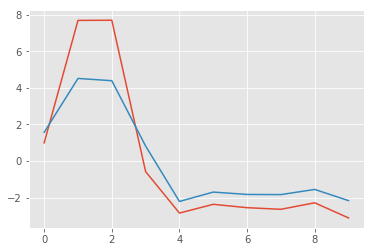

In [150]:
plt.plot(np.arange(10),df[14]['PC1'],'-')
plt.plot(np.arange(10),df[77]['PC1'],'-')

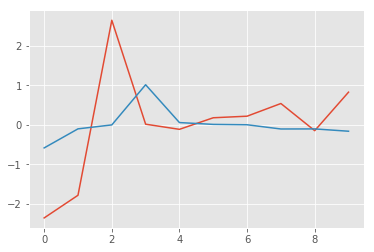

In [151]:
plt.plot(np.arange(10),df[14]['PC2'],'-')
plt.plot(np.arange(10),df[77]['PC2'],'-')

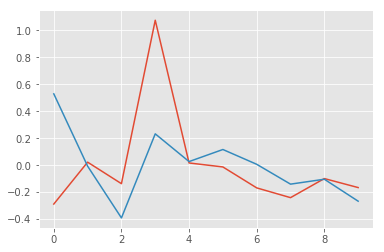

In [152]:
plt.plot(np.arange(10),df[14]['PC3'],'-')
plt.plot(np.arange(10),df[77]['PC3'],'-')

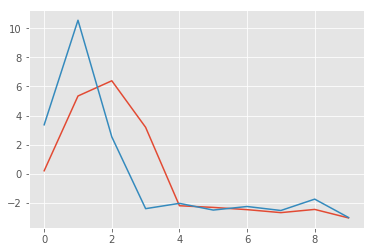

In [153]:
plt.plot(np.arange(10),df[18]['PC1'],'-')
plt.plot(np.arange(10),df[59]['PC1'],'-')

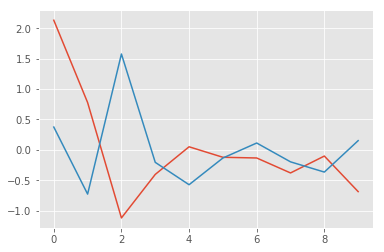

In [154]:
plt.plot(np.arange(10),df[18]['PC2'],'-')
plt.plot(np.arange(10),df[59]['PC2'],'-')

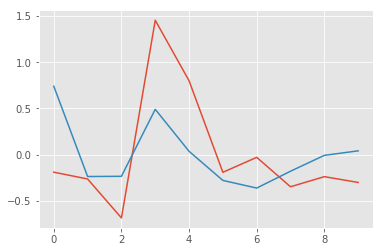

In [155]:
plt.plot(np.arange(10),df[18]['PC3'],'-')
plt.plot(np.arange(10),df[59]['PC3'],'-')

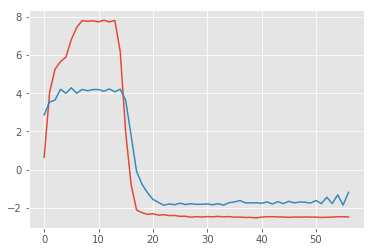

In [77]:
plt.plot(np.arange(57),df[14]['PC1'],'-')
plt.plot(np.arange(57),df[77]['PC1'],'-')

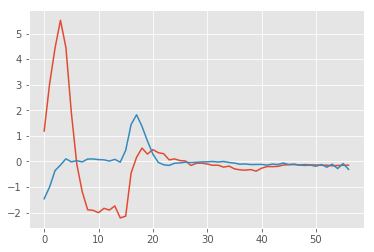

In [78]:
plt.plot(np.arange(57),df[14]['PC2'],'-')
plt.plot(np.arange(57),df[77]['PC2'],'-')

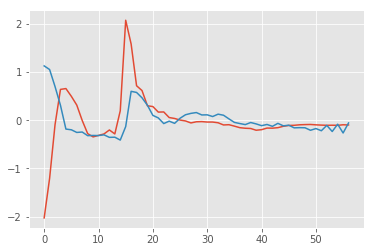

In [79]:
plt.plot(np.arange(57),df[14]['PC3'],'-')
plt.plot(np.arange(57),df[77]['PC3'],'-')

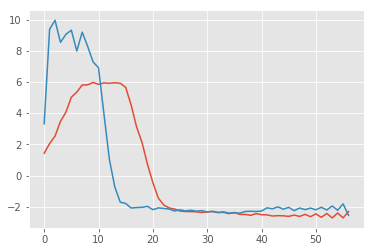

In [80]:
plt.plot(np.arange(57),df[18]['PC1'],'-')
plt.plot(np.arange(57),df[59]['PC1'],'-')
#plot(np.arange(57),pcaList[191][0],'-')

#pdf = df[0][[0,1,'label']]
#pdf
#len(df)

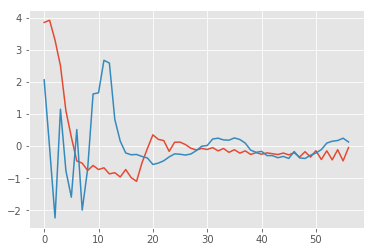

In [81]:
plt.plot(np.arange(57),df[18]['PC2'],'-')
plt.plot(np.arange(57),df[59]['PC2plt.plot(np.arange(57),df[18]['PC1'],'-')
plt.plot(np.arange(57),df[59]['PC1'],'-')'],'-')

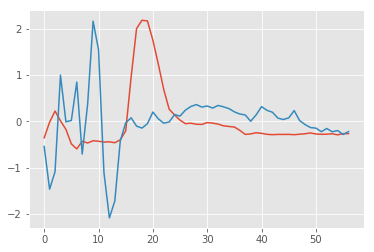

In [82]:
plt.plot(np.arange(57),df[18]['PC3'],'-')
plt.plot(np.arange(57),df[59]['PC3'],'-')

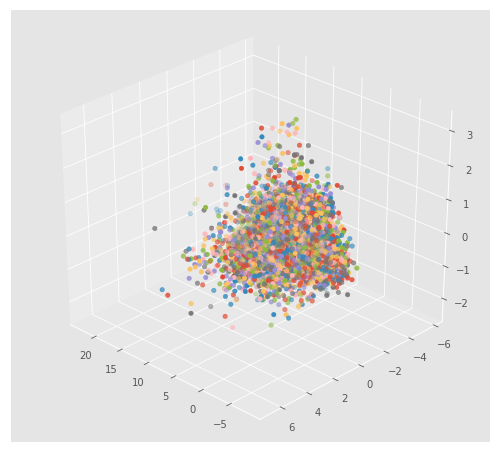

In [157]:
fig = plt.figure(1, figsize=(7, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=134)
#c= le.transform(df[i].ix[:,3]),
#X = df
#df[2564].ix[:,0]
for i in range(2565):
    ax.scatter(df[i].ix[:,0], df[i].ix[:,1], df[i].ix[:,2], cmap=plt.cm.spectral)
    
#ax.scatter(df[0].ix[:,0], df[0].ix[:,1], df[0].ix[:,2],  cmap=plt.cm.spectral)
#ax.scatter(df[1].ix[:,0], df[1].ix[:,1], df[1].ix[:,2],  cmap=plt.cm.spectral)
#X.ix[:,3]

In [8]:
sign_list = signs_flat.columns.values
sign_list
right_match = ['_R']
right_matching = [s for s in sign_list if any(xs in s for xs in right_match)]
left_matching = [s for s in sign_list if(s not in right_matching)]
left_signs_flat = signs_flat[left_matching]

In [9]:
left_signs_flat

,label,x_L1,x_L2,x_L3,x_L4,x_L5,x_L6,x_L7,x_L8,x_L9,...,little_L3,little_L4,little_L5,little_L6,little_L7,little_L8,little_L9,little_L10,ID,folder
0,alive,-0.829550,-0.830827,-0.947152,-0.988947,-0.995125,-0.971427,-0.976731,-0.960156,-0.952116,...,-0.282287,-0.282071,-0.281849,-0.263276,-0.249866,-0.255124,-0.258778,-0.254904,1.0,tctodd1
0,all,-1.007759,-0.700196,-0.694354,-0.711910,-0.586102,-0.716909,-1.091285,-1.095060,-1.130628,...,-0.199427,-0.216581,-0.208978,-0.196419,-0.196217,-0.199265,-0.199193,-0.186806,1.0,tctodd1
0,answer,-1.696254,0.318512,0.265583,-0.168806,-1.584464,-2.045805,-2.535879,-2.602692,-2.574418,...,4.942464,1.595479,-0.736610,-0.168829,-0.422342,-0.413812,-0.208082,-0.734378,1.0,tctodd1
0,boy,-1.855734,-1.648499,-1.401373,-1.385420,-1.562499,-1.703249,-1.705427,-1.672683,-1.611072,...,-0.347537,-0.355341,-0.333335,-0.333515,-0.333615,-0.332234,-0.331812,-0.333786,1.0,tctodd1
0,building,-1.347786,0.590049,1.511819,0.127579,-2.655601,-2.230544,-1.816336,-1.427089,-1.362025,...,0.558495,-0.083144,-0.433757,-0.352676,-0.276046,-0.198739,-0.272092,-0.410188,1.0,tctodd1
0,buy,-2.165366,-2.146647,-2.322613,-2.502753,-2.295657,-2.267241,-2.164406,-2.373216,-2.492514,...,-0.303264,-0.246734,-0.213477,-0.249668,-0.179399,-0.195264,-0.213555,-0.201818,1.0,tctodd1
0,change_mind_,-0.682832,-0.584544,-0.557217,-0.585561,-0.570511,-0.554215,-0.548624,-0.569008,-0.514326,...,-0.369190,-0.369190,-0.369190,-0.369190,-0.369190,-0.369190,-0.369190,-0.369190,1.0,tctodd1
0,cold,-3.358314,-2.662256,-2.456956,-2.764288,-3.012284,-3.377079,-3.162054,-3.274123,-3.455599,...,5.568526,0.042387,-0.271808,-0.364881,-0.138468,-0.339390,-0.018024,-0.813060,1.0,tctodd1
0,come,-0.996554,-0.868504,-0.913982,-0.966485,-0.984411,-1.006339,-0.936626,-0.984625,-0.986408,...,-0.224666,-0.225232,-0.226839,-0.220771,-0.214595,-0.210258,-0.202795,-0.204914,1.0,tctodd1
0,computer_PC_,-2.012918,-0.223762,-2.533773,-3.764747,-3.635904,-3.955598,-3.413487,-3.667546,-3.965932,...,-0.209263,-0.023768,-0.121039,-0.169360,-0.212439,-0.235742,-0.273887,-0.312526,1.0,tctodd1


In [10]:
#signs_All_ts right matching
sign_list = signs_all_ts.columns.values
sign_list
left_match = ['_L']
left_matching = [s for s in sign_list if any(xs in s for xs in left_match)]
right_matching = [s for s in sign_list if(s not in left_matching)]
right_signs_all_ts = signs_all_ts[right_matching]
right_signs_all_ts 
#signs_all_ts


,ID,folder,fore_R,label,little_R,middle_R,pitch_R,ring_R,roll_R,thumb_R,x_R,y_R,yaw_R,z_R
0,1.0,tctodd1,-0.290910,alive,-0.568776,-0.653255,-0.148152,-0.468900,-1.182477,0.083674,-0.456325,-0.210564,-0.310401,1.483217
1,1.0,tctodd1,-0.290910,alive,-0.743803,-0.642020,0.849040,-0.468900,-2.418814,-0.269269,-1.244969,0.678376,0.698257,2.285568
2,1.0,tctodd1,-0.290910,alive,-0.751642,-0.640796,1.313268,-0.468900,-2.751933,-0.243747,-1.135770,0.793448,0.490480,2.594517
3,1.0,tctodd1,-0.290910,alive,-0.754278,-0.650819,1.130879,-0.468900,-2.470062,-0.244004,-0.806907,0.722122,0.305047,2.046111
4,1.0,tctodd1,-0.290910,alive,-0.691883,-0.658228,-0.189283,-0.468900,-1.053965,0.221341,-0.145423,-0.484874,-0.518757,1.243246
5,1.0,tctodd1,-0.290910,alive,-0.545816,-0.656663,-0.224068,-0.468900,-0.743535,0.388204,-0.051200,-0.560869,-0.745703,1.390113
6,1.0,tctodd1,-0.290910,alive,-0.554039,-0.657221,-0.262665,-0.468900,-0.781411,0.289393,-0.239121,-0.526663,-0.695773,1.366873
7,1.0,tctodd1,-0.290910,alive,-0.574607,-0.657314,-0.244599,-0.468900,-0.791611,0.323861,-0.285973,-0.555731,-0.717948,1.349311
8,1.0,tctodd1,-0.290910,alive,-0.577458,-0.656559,-0.221385,-0.468900,-0.867061,0.326927,-0.273485,-0.501851,-0.645643,1.387989
9,1.0,tctodd1,-0.290910,alive,-0.584342,-0.658329,-0.255177,-0.468900,-0.789222,0.380543,-0.192641,-0.613260,-0.768569,1.317157


In [11]:
sign_list = signs_flat.columns.values
sign_list
left_match = ['_L']
left_matching = [s for s in sign_list if any(xs in s for xs in left_match)]
right_matching = [s for s in sign_list if(s not in left_matching)]
right_signs_flat = signs_flat[right_matching]

In [12]:
right_signs_flat

,label,x_R1,x_R2,x_R3,x_R4,x_R5,x_R6,x_R7,x_R8,x_R9,...,little_R3,little_R4,little_R5,little_R6,little_R7,little_R8,little_R9,little_R10,ID,folder
0,alive,-0.456325,-1.244969,-1.135770,-0.806907,-0.145423,-0.051200,-0.239121,-0.285973,-0.273485,...,-0.751642,-0.754278,-0.691883,-0.545816,-0.554039,-0.574607,-0.577458,-0.584342,1.0,tctodd1
0,all,2.513375,1.474708,-4.771019,-2.641097,-0.035498,0.243450,0.284367,0.065988,0.482702,...,-0.581656,-0.726882,-0.464719,-0.237468,-0.301168,-0.259087,-0.312280,-0.253003,1.0,tctodd1
0,answer,0.656874,-1.465327,-1.804689,-0.364239,1.064019,0.818471,1.069957,0.799919,0.863740,...,2.458127,0.883093,-0.030776,0.279016,0.086733,0.083269,0.147054,-0.115664,1.0,tctodd1
0,boy,-0.313214,-1.550622,-1.171855,-1.613776,-0.283222,0.513997,0.161788,0.294347,0.199580,...,1.871067,1.639190,-0.196382,-0.273116,-0.300746,-0.417892,-0.223597,-0.457206,1.0,tctodd1
0,building,1.020468,-1.198993,-1.058406,-0.153567,1.903417,1.822790,1.963677,1.759717,1.774772,...,-0.364246,-0.284743,0.182835,0.219087,0.255548,0.224230,0.210773,0.285662,1.0,tctodd1
0,buy,-1.408837,-2.300530,-0.602784,-0.182372,1.035477,0.877884,1.009736,1.028471,0.654002,...,1.522814,-0.365475,-0.294682,-0.431733,-0.297260,-0.268529,-0.162169,-0.406101,1.0,tctodd1
0,change_mind_,-0.418142,-0.897113,-0.907770,-0.507759,0.419338,0.201202,0.333506,0.298432,0.250189,...,1.342507,0.428905,-0.378004,-0.237825,-0.332349,-0.309362,-0.257863,-0.512326,1.0,tctodd1
0,cold,0.861133,-0.158797,-0.088048,0.410193,0.166180,0.513840,0.695372,0.801288,0.953472,...,2.629514,0.193090,0.048666,0.005828,0.281270,0.173670,0.297329,-0.025652,1.0,tctodd1
0,come,-0.439186,-1.233180,-2.454078,-1.619382,-0.173817,-0.333662,-0.299687,-0.320331,-0.298732,...,1.899051,1.263408,-0.298039,-0.087224,-0.195081,-0.238904,-0.142014,-0.417568,1.0,tctodd1
0,computer_PC_,-1.313192,-5.001031,-1.661243,1.643139,1.446970,1.819730,1.228189,1.519609,1.220594,...,0.407375,-0.012902,0.037880,0.054590,0.157971,0.099133,0.189608,-0.023643,1.0,tctodd1


In [13]:
X_right = right_signs_flat[right_signs_flat.columns[1:-2]]
#del X_left['label']
Y_right = right_signs_flat['label']
le = LabelEncoder()
le.fit(Y_right)
Y_left = le.transform(Y_right)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_right, Y_right, test_size=0.40, random_state=42)

In [15]:
clf = svm.SVC(kernel='linear', C=10)
clf.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
sum(y_pred == y_test)/len(y_test)

0.95321637426900585

In [17]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

In [18]:
i=0
combinations = []

for r in range(cnf_matrix.shape[0]):
    for c in range(cnf_matrix.shape[1]):
        if(r != c and cnf_matrix[r,c]>1):
            combinations.append([ le.inverse_transform(r), le.inverse_transform(c),cnf_matrix[r,c] ])
            i = i +1
            #print(i)

           

In [19]:
sim_df = pd.DataFrame(combinations, columns = ['x','y','similarity'])

In [20]:
sim_df.sort(['similarity'], ascending = [0])


C:\Users\charu mulwani\Anaconda3\envs\py35\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,x,y,similarity
0,answer,hurry,3
5,love,responsible,3
1,crazy,think,2
2,give,thank,2
3,hurry,answer,2
4,later,write,2


In [26]:
def pca_transformRight(signs_all_ts):

    chunkList = np.array_split(signs_all_ts, 2565)

    pcaList = list()
    
    i = 1

    for chunk in chunkList:
        X = chunk[chunk.columns[2:]]
        del X['label']
        Y= chunk['label']
        pca = decomposition.PCA(n_components=3)
        pca.fit(X)
        X = pca.transform(X)
        Xnew = pd.DataFrame(X)
        Xnew['label'] = Y
        Xnew['col'] = [i] * 10
        pcaList.append(Xnew)
        i=i+1
    return pcaList

    

In [27]:
df = pca_transformRight(right_signs_all_ts)
for i in range(2565):
    df[i].columns = ['PC1','PC2','PC3','Label','col']

In [28]:
le.transform(['answer','hurry'])

array([ 5, 35], dtype=int64)

In [29]:
le.transform(['love','responsible'])

array([44, 62], dtype=int64)

In [30]:
le.transform(['crazy','think'])

array([14, 77], dtype=int64)

In [31]:
le.transform(['give','thank'])

array([25, 76], dtype=int64)

In [32]:
le.transform(['later','write'])

array([42, 90], dtype=int64)

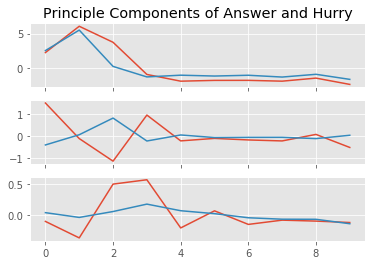

In [33]:
f, pcaplot = plt.subplots(3, sharex=True)
pcaplot[0].plot(np.arange(10),df[5]['PC1'],'-')
pcaplot[0].plot(np.arange(10),df[35]['PC1'],'-')
pcaplot[0].set_title('Principle Components of Answer and Hurry')
pcaplot[1].plot(np.arange(10),df[5]['PC2'],'-')
pcaplot[1].plot(np.arange(10),df[35]['PC2'],'-')
pcaplot[2].plot(np.arange(10),df[5]['PC3'],'-')
pcaplot[2].plot(np.arange(10),df[35]['PC3'],'-')

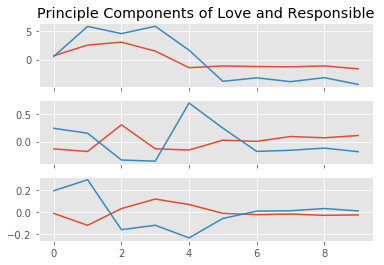

In [34]:
f, pcaplot = plt.subplots(3, sharex=True)
pcaplot[0].plot(np.arange(10),df[44]['PC1'],'-')
pcaplot[0].plot(np.arange(10),df[62]['PC1'],'-')
pcaplot[0].set_title('Principle Components of Love and Responsible')
pcaplot[1].plot(np.arange(10),df[44]['PC2'],'-')
pcaplot[1].plot(np.arange(10),df[62]['PC2'],'-')
pcaplot[2].plot(np.arange(10),df[44]['PC3'],'-')
pcaplot[2].plot(np.arange(10),df[62]['PC3'],'-')

In [35]:
rep = []

for i in range (1,96):
    rep.append([i]*10)
    
#np.array(rep).reshape(950,)

In [36]:
rep = np.array(rep).reshape(950,)

In [37]:
NewRep = [rep]*27
NewRep = np.array(NewRep).reshape(25650,)

In [38]:
newDf = pd.DataFrame()

In [39]:
pd.DataFrame(NewRep)

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [40]:
for i in range(2565):
    newDf = newDf.append(df[i])

In [41]:
newDf


,PC1,PC2,PC3,Label,col
0,-0.345761,0.218570,0.098487,alive,1
1,2.041538,0.367569,-0.001116,alive,1
2,2.454639,-0.150129,-0.208696,alive,1
3,1.860274,-0.265944,0.209769,alive,1
4,-0.802605,-0.030935,0.227107,alive,1
5,-1.121759,-0.136305,-0.075145,alive,1
6,-1.021980,0.021632,-0.055525,alive,1
7,-1.026394,0.017568,-0.076587,alive,1
8,-0.917829,0.018495,-0.056833,alive,1
9,-1.120123,-0.060521,-0.061460,alive,1


In [42]:
newDf['coded'] = NewRep

In [43]:
newDf


,PC1,PC2,PC3,Label,col,coded
0,-0.345761,0.218570,0.098487,alive,1,1
1,2.041538,0.367569,-0.001116,alive,1,1
2,2.454639,-0.150129,-0.208696,alive,1,1
3,1.860274,-0.265944,0.209769,alive,1,1
4,-0.802605,-0.030935,0.227107,alive,1,1
5,-1.121759,-0.136305,-0.075145,alive,1,1
6,-1.021980,0.021632,-0.055525,alive,1,1
7,-1.026394,0.017568,-0.076587,alive,1,1
8,-0.917829,0.018495,-0.056833,alive,1,1
9,-1.120123,-0.060521,-0.061460,alive,1,1


In [68]:
#newDf.reset_index()
newDf.ix[0][[0]]
#range(10)

,PC1
0,-0.345761
0,-2.829407
0,-0.055366
0,1.127335
0,-0.175224
0,2.254187
0,0.475589
0,2.494936
0,0.776087
0,2.369794


In [95]:
cm = plt.cm.get_cmap('RdYlBu')


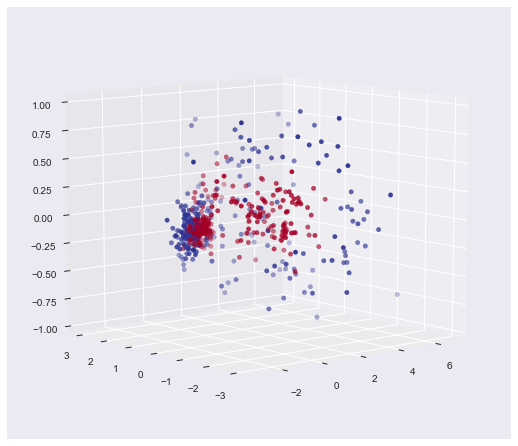

In [118]:
sub = newDf[(newDf['Label'] == 'alive') | (newDf['Label'] == 'Norway')]
sub

fig = plt.figure(1, figsize=(7, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=10, azim=-130)
#c= le.transform(df[i].ix[:,3]),
#X = df
#df[2564].ix[:,0]
for i in range(10):
    ax.scatter(sub.ix[i][[0]], sub.ix[i][[1]], sub.ix[i][[2]],c=sub.ix[i][[5]], cmap=cm)

In [ ]:
sub = newDf[(newDf['Label'] == 'answer') | (newDf['Label'] == 'hurr')]
sub

fig = plt.figure(1, figsize=(7, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=10, azim=-130)
#c= le.transform(df[i].ix[:,3]),
#X = df
#df[2564].ix[:,0]
for i in range(10):
    ax.scatter(sub.ix[i][[0]], sub.ix[i][[1]], sub.ix[i][[2]],c=sub.ix[i][[5]], cmap=cm)

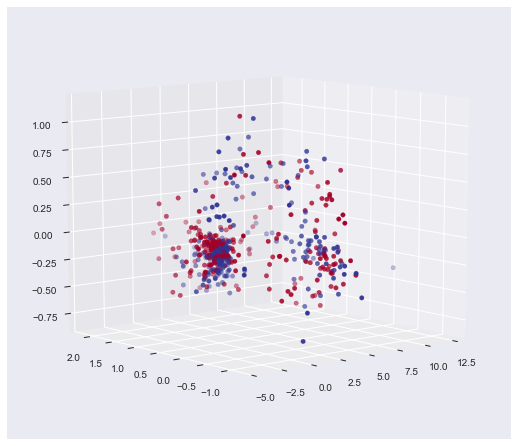

In [119]:
sub = newDf[(newDf['Label'] == 'crazy') | (newDf['Label'] == 'think')]
sub

fig = plt.figure(1, figsize=(7, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=10, azim=-130)
#c= le.transform(df[i].ix[:,3]),
#X = df
#df[2564].ix[:,0]
for i in range(10):
    ax.scatter(sub.ix[i][[0]], sub.ix[i][[1]], sub.ix[i][[2]],c=sub.ix[i][[5]], cmap=cm)

In [107]:
from mpl_toolkits.mplot3d import Axes3D
ax = Axes3D(fig)
ax.scatter(xx,yy,zz, marker='o', s=20, c="goldenrod", alpha=0.6)
for ii in xrange(0,360,1):
    ax.view_init(elev=10., azim=ii)
    savefig("movie%d.png" % ii)

NameError: name 'xx' is not defined

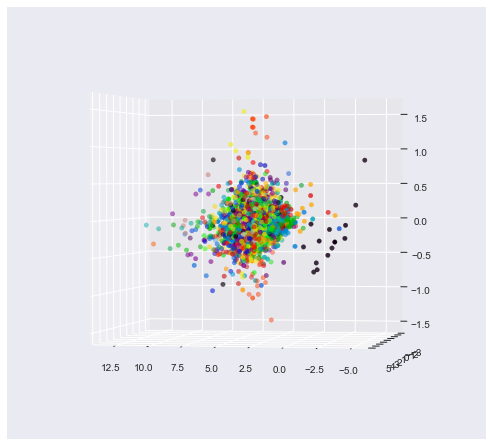

In [111]:
fig = plt.figure(1, figsize=(7, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=1, azim=100)
#c= le.transform(df[i].ix[:,3]),
#X = df
#df[2564].ix[:,0]
#for i in range(2):


ax.scatter(newDf.ix[1][[0]], newDf.ix[1][[1]], newDf.ix[1][[2]],c=newDf.ix[1][[5]], cmap=plt.cm.spectral)

In [166]:
import itertools  
plt.figure(figsize=(20,20))
my_classes=le.inverse_transform(pd.DataFrame(Y_left)[0].astype(int))
plot_confusion_matrix(cnf_matrix, classes= labels,
                      title='Confusion matrix, without normalization')

NameError: name 'plot_confusion_matrix' is not defined

In [99]:
report = classification_report(y_test, clf.predict(X_test))

In [100]:
report = re.sub(' +', ',', report )
report

',precision,recall,f1-score,support\n\n,0,1.00,0.88,0.93,8\n,1,0.80,0.89,0.84,9\n,2,0.93,1.00,0.97,14\n,3,0.91,1.00,0.95,10\n,4,1.00,0.88,0.93,8\n,5,0.69,1.00,0.81,11\n,6,0.55,0.75,0.63,8\n,7,0.78,0.88,0.82,8\n,8,1.00,0.76,0.87,17\n,9,1.00,1.00,1.00,12\n,10,0.90,0.90,0.90,10\n,11,0.92,0.86,0.89,14\n,12,1.00,1.00,1.00,11\n,13,0.92,1.00,0.96,11\n,14,0.71,0.62,0.67,8\n,15,0.83,1.00,0.91,5\n,16,1.00,1.00,1.00,9\n,17,1.00,1.00,1.00,11\n,18,0.77,0.77,0.77,13\n,19,1.00,1.00,1.00,8\n,20,1.00,0.80,0.89,15\n,21,1.00,1.00,1.00,9\n,22,0.78,1.00,0.88,7\n,23,1.00,1.00,1.00,6\n,24,1.00,0.92,0.96,13\n,25,0.92,1.00,0.96,11\n,26,0.85,0.92,0.88,12\n,27,0.92,1.00,0.96,12\n,28,0.60,1.00,0.75,6\n,29,1.00,0.91,0.95,11\n,30,1.00,1.00,1.00,10\n,31,1.00,1.00,1.00,15\n,32,1.00,0.90,0.95,10\n,33,0.94,0.94,0.94,16\n,34,0.85,0.92,0.88,12\n,35,0.80,0.57,0.67,14\n,36,1.00,0.92,0.96,13\n,37,1.00,0.44,0.62,9\n,38,1.00,0.86,0.92,14\n,39,1.00,0.90,0.95,10\n,40,1.00,0.92,0.96,13\n,41,1.00,1.00,1.00,9\n,42,1.00,0.91,0.95,1

In [101]:
line = report.split('\n')[0]

In [102]:
line

',precision,recall,f1-score,support'

In [103]:
columns = ['class']
columns.extend(line.split(',')[1:])

In [104]:
columns

['class', 'precision', 'recall', 'f1-score', 'support']

In [105]:
class_report = pd.DataFrame(columns = columns)

In [106]:
class_report

,class,precision,recall,f1-score,support


In [107]:
for line in report.split('\n')[2:95]:
    row = line.split(',')[1:]
    row = list(map(float,row))
    class_report = class_report.append(pd.Series(row, index=class_report.columns), ignore_index=True)

In [108]:
class_report['class_name'] = le.inverse_transform(class_report['class'].astype(int))

In [109]:
Y_left

array([ 3,  4,  5, ..., 92, 93, 94], dtype=int64)

In [110]:
pd.DataFrame(Y_left)

,0
0,3
1,4
2,5
3,6
4,7
5,8
6,9
7,10
8,11
9,12


In [111]:
classes=le.inverse_transform(pd.DataFrame(Y_left)[0].astype(int)

SyntaxError: unexpected EOF while parsing (<ipython-input-111-307512868bcc>, line 1)

In [112]:
classes=le.inverse_transform(pd.DataFrame(Y_left)[0].astype(int))

In [113]:
classes

array(['alive', 'all', 'answer', ..., 'yes', 'you', 'zero'], dtype=object)

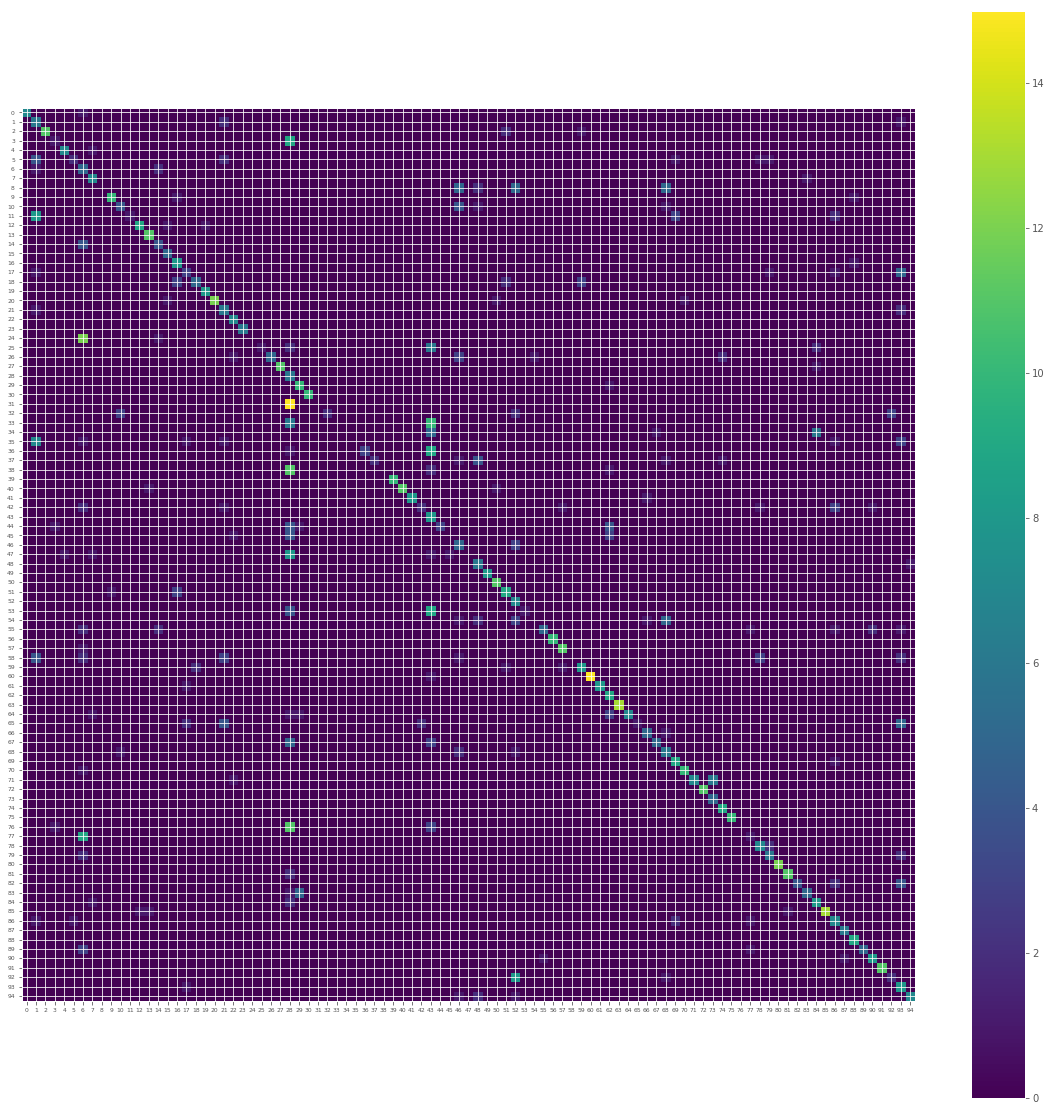

In [92]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
confmat=cnf_matrix
ticks=np.linspace(0, 94,num=95)
plt.imshow(confmat, interpolation='none')
plt.colorbar()
plt.xticks(ticks,fontsize=6)
plt.yticks(ticks,fontsize=6)
plt.grid(True)
plt.show()

In [178]:
le.inverse_transform([55,82])

array(['pen', 'what'], dtype=object)